In [1]:
import pandas as pd
import warnings
import pandas as pd
from collections import defaultdict
from pyvis.network import Network
from itertools import combinations
import numpy as np

pd.set_option('display.max_colwidth',100)

data=pd.read_csv('dataset/Assignment-1_Data.csv',sep=';',usecols=['Itemname','CustomerID','BillNo'],nrows=100000).dropna(subset='Itemname')
data_concatinated=data.groupby(['CustomerID','BillNo'])['Itemname'].agg(','.join).reset_index()
data_concatinated['Itemname1'] = data_concatinated['Itemname'].str.split(',')

# Keep only the rows where the length of the split items is greater than 1
data_concatinated = data_concatinated[data_concatinated['Itemname1'].apply(lambda x: len(x) > 1)]
data_concatinated.drop(columns=['Itemname1'], inplace=True)
data_concatinated.head()

ModuleNotFoundError: No module named 'pandas'

In [187]:
data_concatinated.shape

(3010, 3)

In [188]:
# Function to generate pairs of source and target items from a string of items
def generate_pairs(item_str):
    items = item_str.split(',')
    return list(combinations(items, 2))

# Apply the function to generate pairs for each row
relationship_df  = data_concatinated.assign(source_target=data_concatinated['Itemname'].apply(generate_pairs)) \
         .explode('source_target') \
         .rename(columns={'source_target': 'source_target_pair'})

# # Split the pairs into source and target columns
relationship_df [['source', 'target']] = pd.DataFrame(relationship_df ['source_target_pair'].tolist(), index=relationship_df.index)

# Drop the intermediate column
relationship_df .drop(columns=['Itemname', 'source_target_pair'], inplace=True)
relationship_df =relationship_df .sort_values(by='source').dropna(subset='source')
relationship_df =relationship_df[relationship_df['source'] != ""]
relationship_df

,CustomerID,BillNo,source,target
2675,17338.0,544586,1 HANGER,KEEP OUT BOYS DOOR HANGER
2675,17338.0,544586,1 HANGER,METAL SIGN TAKE IT OR LEAVE IT
2675,17338.0,544586,1 HANGER,HOME SWEET HOME METAL SIGN
2675,17338.0,544586,1 HANGER,HAND OVER THE CHOCOLATE SIGN
2675,17338.0,544586,1 HANGER,BEWARE OF THE CAT METAL SIGN
...,...,...,...,...
2191,16395.0,541038,pack/12,FELTCRAFT DOLL MOLLY
2191,16395.0,541038,pack/12,PINK CREAM FELT CRAFT TRINKET BOX
2191,16395.0,541038,pack/12,ASSORTED CREEPY CRAWLIES
2191,16395.0,541038,pack/12,LUNCH BAG PINK POLKADOT


In [189]:
relationship_df=pd.DataFrame(np.sort(relationship_df [['source', 'target']].values, axis = 1), columns = relationship_df [['source', 'target']].columns)

In [190]:
relationship_df["value"] = 1
# relationship_df=relationship_df[["source","target","value"]].reset_index(drop=True)

# Display the sorted DataFrame
relationship_df=relationship_df.groupby(["source","target"], sort=False, as_index=False).sum().sort_values(by='value', ascending=False)
relationship_df=relationship_df[relationship_df['value']>20]

In [191]:
relationship_df=relationship_df[relationship_df['source']!=relationship_df['target']]

In [192]:
relationship_df

,source,target,value
306047,HEART OF WICKER LARGE,HEART OF WICKER SMALL,165
41461,ALARM CLOCK BAKELIKE GREEN,ALARM CLOCK BAKELIKE RED,142
480996,RED HANGING HEART T-LIGHT HOLDER,WHITE HANGING HEART T-LIGHT HOLDER,136
533903,SET OF 3 CAKE TINS PANTRY DESIGN,SET OF 6 SPICE TINS PANTRY DESIGN,130
314485,HOME BUILDING BLOCK WORD,LOVE BUILDING BLOCK WORD,122
...,...,...,...
174306,CREAM CUPID HEARTS COAT HANGER,HEART OF WICKER SMALL,21
314525,HOME BUILDING BLOCK WORD,WOOD S/3 CABINET ANT WHITE FINISH,21
364527,LUNCH BAG RED RETROSPOT,RECYCLING BAG RETROSPOT,21
152077,CHRISTMAS CRAFT LITTLE FRIENDS,PAPER CHAIN KIT 50'S CHRISTMAS,21


In [193]:
import networkx as nx
# Create a graph from a pandas dataframe
G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

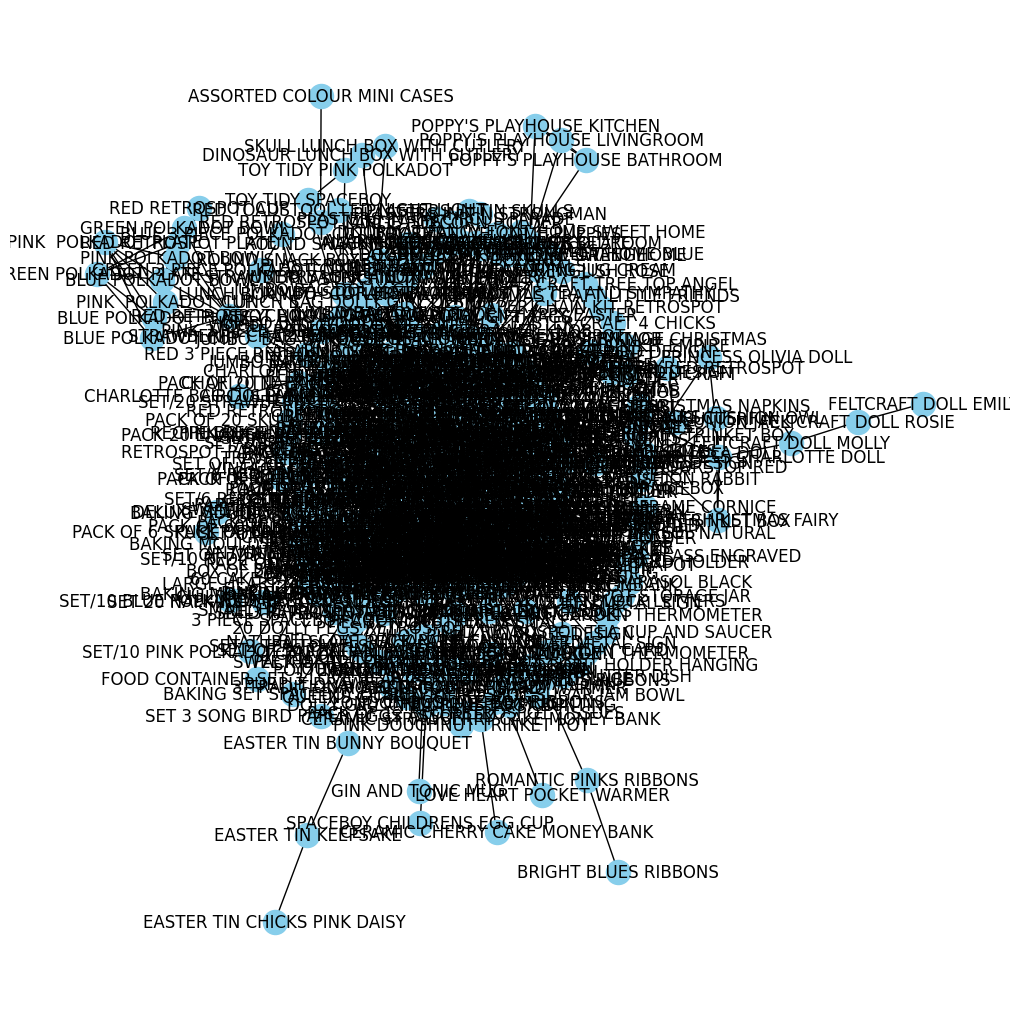

In [194]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [195]:
from pyvis.network import Network
net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')

node_degree = dict(G.degree)

#Setting up node size attribute
nx.set_node_attributes(G, node_degree, 'size')

net.from_nx(G)
net.show("witcher.html")

witcher.html


In [196]:
# dict(G.degree)
dict(sorted(dict(G.degree).items(), key=lambda item: item[1], reverse=True))

{'WHITE HANGING HEART T-LIGHT HOLDER': 146,
 'HEART OF WICKER SMALL': 72,
 'SET OF 3 CAKE TINS PANTRY DESIGN': 56,
 'HEART OF WICKER LARGE': 53,
 'REGENCY CAKESTAND 3 TIER': 50,
 'LUNCH BAG RED RETROSPOT': 47,
 'PACK OF 72 RETROSPOT CAKE CASES': 46,
 'JAM MAKING SET PRINTED': 41,
 'NATURAL SLATE HEART CHALKBOARD': 41,
 'JUMBO BAG RED RETROSPOT': 41,
 'PLEASE ONE PERSON METAL SIGN': 39,
 'RED HANGING HEART T-LIGHT HOLDER': 34,
 'LOVE BUILDING BLOCK WORD': 33,
 'SET OF 3 HEART COOKIE CUTTERS': 32,
 'RECIPE BOX PANTRY YELLOW DESIGN': 31,
 '72 SWEETHEART FAIRY CAKE CASES': 31,
 'KEY FOB ': 29,
 'JAM MAKING SET WITH JARS': 28,
 'SET/20 RED RETROSPOT PAPER NAPKINS': 27,
 '60 TEATIME FAIRY CAKE CASES': 26,
 'CLOTHES PEGS RETROSPOT PACK 24': 26,
 'HOME BUILDING BLOCK WORD': 24,
 'RETROSPOT HEART HOT WATER BOTTLE': 24,
 'LUNCH BAG SUKI  DESIGN': 24,
 'SET OF 6 SPICE TINS PANTRY DESIGN': 23,
 'ASSORTED COLOUR BIRD ORNAMENT': 23,
 'COOK WITH WINE METAL SIGN': 23,
 'HAND OVER THE CHOCOLATE   SIGN'

In [197]:
# Degree centrality
degree_dict = nx.degree_centrality(G)
degree_dict

{'HEART OF WICKER LARGE': 0.10905349794238683,
 'HEART OF WICKER SMALL': 0.14814814814814817,
 'ALARM CLOCK BAKELIKE GREEN': 0.03703703703703704,
 'ALARM CLOCK BAKELIKE RED': 0.041152263374485604,
 'RED HANGING HEART T-LIGHT HOLDER': 0.06995884773662552,
 'WHITE HANGING HEART T-LIGHT HOLDER': 0.3004115226337449,
 'SET OF 3 CAKE TINS PANTRY DESIGN': 0.11522633744855967,
 'SET OF 6 SPICE TINS PANTRY DESIGN': 0.04732510288065844,
 'HOME BUILDING BLOCK WORD': 0.04938271604938272,
 'LOVE BUILDING BLOCK WORD': 0.06790123456790124,
 'WOODEN FRAME ANTIQUE WHITE': 0.03909465020576132,
 'WOODEN PICTURE FRAME WHITE FINISH': 0.03703703703703704,
 'JAM MAKING SET PRINTED': 0.08436213991769548,
 'JAM MAKING SET WITH JARS': 0.05761316872427984,
 ' BACK DOOR': 0.00617283950617284,
 'KEY FOB ': 0.05967078189300412,
 'GREEN REGENCY TEACUP AND SAUCER': 0.020576131687242802,
 'ROSES REGENCY TEACUP AND SAUCER': 0.020576131687242802,
 'CANDLEHOLDER PINK HANGING HEART': 0.01646090534979424,
 ' SHED': 0.00617

<Axes: >

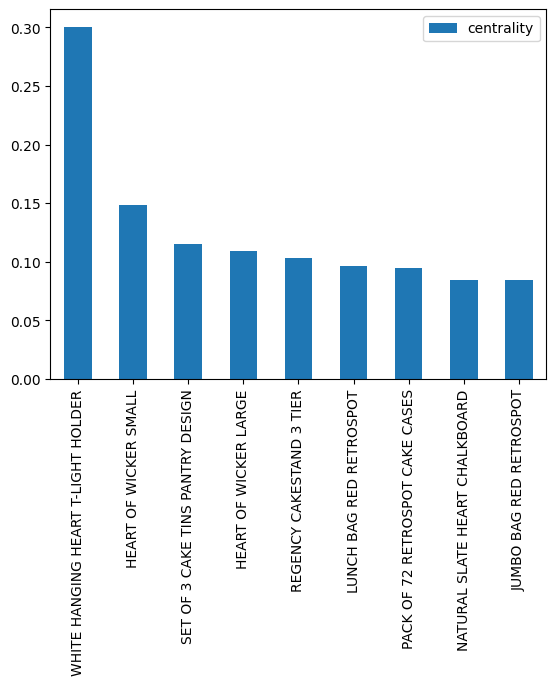

In [198]:
degree_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
degree_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

In [199]:
import community as community_louvain

In [208]:
communities = community_louvain.best_partition(G)
communities

{'HEART OF WICKER LARGE': 0,
 'HEART OF WICKER SMALL': 0,
 'ALARM CLOCK BAKELIKE GREEN': 1,
 'ALARM CLOCK BAKELIKE RED': 1,
 'RED HANGING HEART T-LIGHT HOLDER': 0,
 'WHITE HANGING HEART T-LIGHT HOLDER': 0,
 'SET OF 3 CAKE TINS PANTRY DESIGN': 2,
 'SET OF 6 SPICE TINS PANTRY DESIGN': 2,
 'HOME BUILDING BLOCK WORD': 0,
 'LOVE BUILDING BLOCK WORD': 0,
 'WOODEN FRAME ANTIQUE WHITE': 0,
 'WOODEN PICTURE FRAME WHITE FINISH': 0,
 'JAM MAKING SET PRINTED': 2,
 'JAM MAKING SET WITH JARS': 2,
 ' BACK DOOR': 3,
 'KEY FOB ': 3,
 'GREEN REGENCY TEACUP AND SAUCER': 2,
 'ROSES REGENCY TEACUP AND SAUCER': 2,
 'CANDLEHOLDER PINK HANGING HEART': 0,
 ' SHED': 3,
 ' GARAGE DESIGN': 3,
 'ALARM CLOCK BAKELIKE PINK': 1,
 'WOOD 2 DRAWER CABINET WHITE FINISH': 0,
 'WOOD S/3 CABINET ANT WHITE FINISH': 0,
 'RETROSPOT HEART HOT WATER BOTTLE': 4,
 'SCOTTIE DOG HOT WATER BOTTLE': 4,
 'NATURAL SLATE HEART CHALKBOARD': 0,
 'DOLLY GIRL LUNCH BOX': 5,
 'SPACEBOY LUNCH BOX': 5,
 "POPPY'S PLAYHOUSE BEDROOM": 5,
 "POPPY'S

In [210]:
dict(sorted(communities.items(), key=lambda item: item[1], reverse=False))

{'HEART OF WICKER LARGE': 0,
 'HEART OF WICKER SMALL': 0,
 'RED HANGING HEART T-LIGHT HOLDER': 0,
 'WHITE HANGING HEART T-LIGHT HOLDER': 0,
 'HOME BUILDING BLOCK WORD': 0,
 'LOVE BUILDING BLOCK WORD': 0,
 'WOODEN FRAME ANTIQUE WHITE': 0,
 'WOODEN PICTURE FRAME WHITE FINISH': 0,
 'CANDLEHOLDER PINK HANGING HEART': 0,
 'WOOD 2 DRAWER CABINET WHITE FINISH': 0,
 'WOOD S/3 CABINET ANT WHITE FINISH': 0,
 'NATURAL SLATE HEART CHALKBOARD': 0,
 'BATH BUILDING BLOCK WORD': 0,
 'WOOD BLACK BOARD ANT WHITE FINISH': 0,
 'CREAM HEART CARD HOLDER': 0,
 'PAINTED METAL PEARS ASSORTED': 0,
 'PHOTO FRAME CORNICE': 0,
 'CREAM CUPID HEARTS COAT HANGER': 0,
 'DOORMAT RED RETROSPOT': 0,
 'DOORMAT UNION FLAG': 0,
 'PACK OF 12 HEARTS DESIGN TISSUES': 0,
 'VICTORIAN GLASS HANGING T-LIGHT': 0,
 'DOORMAT HEARTS': 0,
 'WICKER STAR': 0,
 'TOAST ITS - I LOVE YOU': 0,
 'ZINC METAL HEART DECORATION': 0,
 'PINK HEART SHAPE EGG FRYING PAN': 0,
 'METAL 4 HOOK HANGER FRENCH CHATEAU': 0,
 'HEART IVORY TRELLIS LARGE': 0,
 '

In [202]:
nx.set_node_attributes(G, communities, 'group')

In [203]:
com_net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show("witcher_communities.html")

witcher_communities.html


In [225]:
selected_communities = [1,2]  # Example: Selected communities
filtered_nodes = [node for node, community in communities.items() if community in selected_communities]
filtered_graph = G.subgraph(filtered_nodes)

# Step 2: Convert the filtered graph to a PyVis network object
filtered_net = Network(notebook=True, width="1000px", height="700px", bgcolor='#222222', font_color='white')
filtered_net.from_nx(filtered_graph)

# Step 3: Show the filtered network
filtered_net.show("filtered_network.html")

filtered_network.html


In [226]:
# Step 1: Calculate the strength of relationships between selected items
selected_items = ['ALARM CLOCK BAKELIKE GREEN', 'ALARM CLOCK BAKELIKE RED']  # Example: Selected items
relationship_strengths = {}
for item in selected_items:
    neighbors = G.neighbors(item)
    for neighbor in neighbors:
        if neighbor not in selected_items:
            if neighbor not in relationship_strengths:
                relationship_strengths[neighbor] = G[item][neighbor]['value']
            else:
                relationship_strengths[neighbor] += G[item][neighbor]['value']

# Step 2: Sort the relationships in descending order based on their strength
sorted_relationships = sorted(relationship_strengths.items(), key=lambda x: x[1], reverse=True)

# Step 3: Recommend items connected to the selected items with the highest relationship strengths
recommendations = [item for item, _ in sorted_relationships]
recommendations

['ALARM CLOCK BAKELIKE PINK',
 'ALARM CLOCK BAKELIKE ORANGE',
 'ALARM CLOCK BAKELIKE IVORY',
 'ALARM CLOCK BAKELIKE CHOCOLATE',
 'WHITE HANGING HEART T-LIGHT HOLDER',
 'IVORY KITCHEN SCALES',
 'RED KITCHEN SCALES',
 'ASSORTED COLOUR BIRD ORNAMENT',
 'SET OF 3 CAKE TINS PANTRY DESIGN',
 'SOLDIERS EGG CUP',
 'REGENCY CAKESTAND 3 TIER',
 'RED DINER WALL CLOCK',
 'BLUE DINER WALL CLOCK',
 'IVORY DINER WALL CLOCK',
 "PAPER CHAIN KIT 50'S CHRISTMAS",
 'GUMBALL COAT RACK',
 'REX CASH+CARRY JUMBO SHOPPER',
 'RECIPE BOX PANTRY YELLOW DESIGN',
 'SPACEBOY LUNCH BOX',
 'WOODEN PICTURE FRAME WHITE FINISH']

In [224]:
(filtered_nodes)

['ALARM CLOCK BAKELIKE GREEN',
 'ALARM CLOCK BAKELIKE RED',
 'ALARM CLOCK BAKELIKE PINK',
 'ALARM CLOCK BAKELIKE ORANGE',
 'IVORY KITCHEN SCALES',
 'RED KITCHEN SCALES',
 'ALARM CLOCK BAKELIKE IVORY',
 'ALARM CLOCK BAKELIKE CHOCOLATE',
 'IVORY DINER WALL CLOCK',
 'RED DINER WALL CLOCK',
 'BLACK KITCHEN SCALES',
 'BLUE DINER WALL CLOCK',
 'MINT KITCHEN SCALES',
 'ENAMEL MEASURING JUG CREAM',
 'GUMBALL COAT RACK']